In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data sources

In [2]:
base_url = "https://www.mygov.in/sites/default/files/covid/"
vaccine_url = "vaccine/vaccine_counts_today.json?timestamp=1626859800"
covid_url = "covid_state_counts_ver1.json?timestamp=1626859800"

In [3]:
def get_data(url):
    response = requests.get(url)
    return json.loads(response.content)

In [4]:
vaccine_data = get_data(base_url + vaccine_url)

In [5]:
covid_data = get_data(base_url + covid_url)

Uncomment the below lines to see the raw JSON response

In [6]:
# import pprint

# pp = pprint.PrettyPrinter(indent=4)

# pp.pprint(vaccine_data)
# pp.pprint(covid_data)

# Selecting data

In [7]:
vaccine_state_data = vaccine_data['vacc_st_data']

In [8]:
vaccine_df = pd.DataFrame.from_records(vaccine_state_data)

In [9]:
cols_to_consider = ['st_name', 'dose1', 'dose2', 'total_doses']
vaccine_df = vaccine_df[cols_to_consider]

In [10]:
int_cols = ['dose1', 'dose2', 'total_doses']
for col in int_cols:
    vaccine_df[col] = pd.to_numeric(vaccine_df[col], downcast='integer')

In [11]:
vaccine_df.drop(36, axis=0, inplace=True)

In [12]:
covid_df = pd.DataFrame.from_dict(covid_data)

In [13]:
columns_to_consider = ['Name of State / UT', 'Total Confirmed cases', 'Active', 'Cured/Discharged/Migrated', 'Death']

In [14]:
covid_df = covid_df[columns_to_consider]

In [15]:
covid_df.columns = ['st_name', 'total_cases', 'active', 'cured', 'death']

In [16]:
int_columns = ['total_cases', 'active', 'cured', 'death']

for col in int_columns:
    covid_df[col] = pd.to_numeric(covid_df[col], downcast='integer')

In [17]:
covid_df['st_name'] = covid_df['st_name'].replace('Telengana', 'Telangana')

In [18]:
df = covid_df.merge(vaccine_df, how='inner', on='st_name')

In [19]:
df['percentage_cured'] = df['cured'] * 100.0 / df['total_cases']

In [20]:
df['percentage_death'] = df['death'] * 100.0 / df['total_cases']

In [21]:
df['percentage_active'] = df['active'] * 100.0 / df['total_cases']

In [23]:
df.sort_values(by='percentage_cured', ascending=False, axis=0)

,st_name,total_cases,active,cured,death,dose1,dose2,total_doses,percentage_cured,percentage_death,percentage_active
7,Dadra and Nagar Haveli and Daman and Diu,10612,27,10581,4,518047,68353,586400,99.707878,0.037693,0.254429
28,Rajasthan,953415,391,944073,8951,23367032,5745243,29112275,99.020154,0.938836,0.041010
18,Lakshadweep,10092,74,9969,49,49196,13519,62715,98.781213,0.485533,0.733254
10,Gujarat,824546,411,814059,10076,23145616,7019612,30165228,98.728149,1.222006,0.049846
11,Haryana,769605,784,759213,9608,8692616,2100748,10793364,98.649697,1.248433,0.101870
23,Madhya Pradesh,791689,190,780987,10512,21562031,4130311,25692342,98.648207,1.327794,0.023999
5,Chandigarh,61907,42,61056,809,554918,148571,703489,98.625357,1.306799,0.067844
33,Uttar Pradesh,1707953,1093,1684123,22737,34795562,6764570,41560132,98.604763,1.331243,0.063995
4,Bihar,724081,634,713815,9632,18258322,3261315,21519637,98.582203,1.330238,0.087559
17,Ladakh,20278,94,19978,206,185298,62526,247824,98.520564,1.015879,0.463557


<AxesSubplot:>

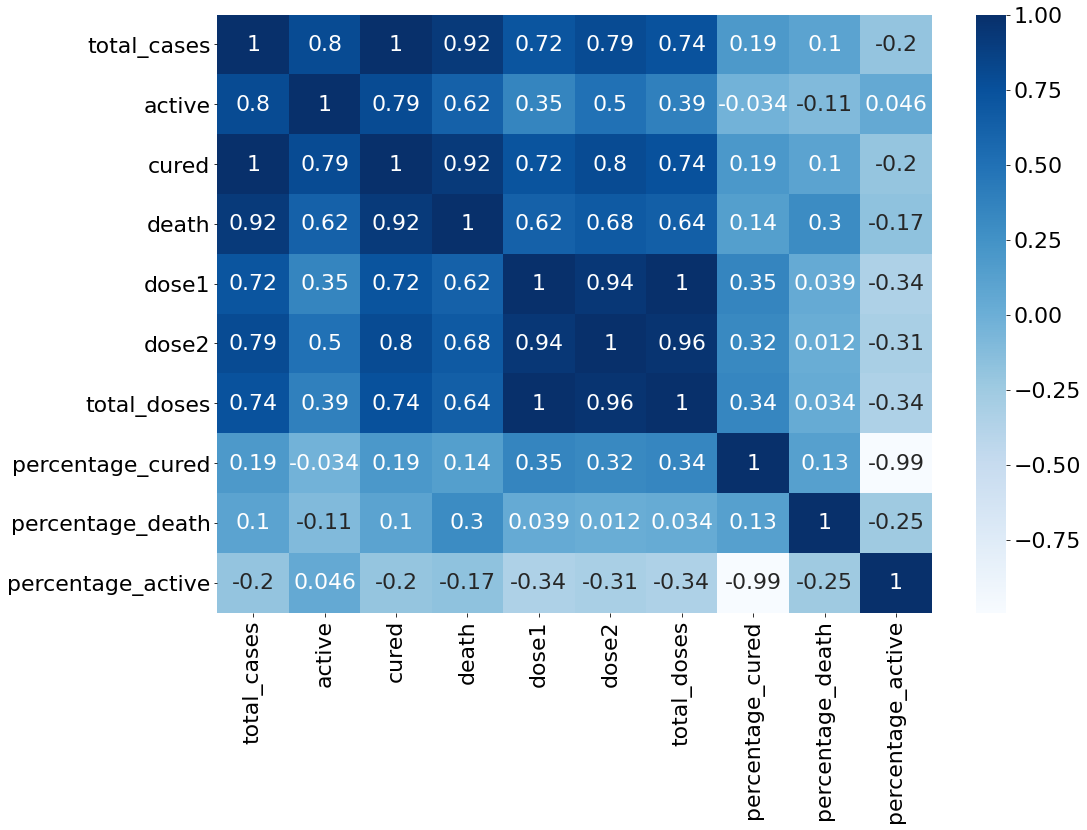

In [24]:
plt.rcParams["font.size"] = 22
plt.figure(figsize=(16,11))
sns.heatmap(df.corr(), cmap='Blues', annot=True)